<a href="https://colab.research.google.com/github/tashramsden/100_days_python/blob/main/day-72_data_vis_languages/Day_72_matplotlib_coding_languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Popularity of coding languages - Data visualisation with Matplotlib


## Summary

* used .groupby() to explore the number of posts and 
entries per programming language

* converted strings to Datetime objects with to_datetime() for easier plotting

* reshaped our DataFrame by converting categories to columns using .pivot()

* used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

* created (multiple) line charts using .plot() with a for-loop

* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

* added a legend to tell apart which line is which by colour

* smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.tail()

,DATE,TAG,POSTS
2113,2021-04-01 00:00:00,swift,2572
2114,2021-04-01 00:00:00,r,5573
2115,2021-04-01 00:00:00,ruby,610
2116,2021-04-01 00:00:00,delphi,191
2117,2021-04-01 00:00:00,go,701


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape  # 3 columns, 2118 rows

(2118, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()  # gives number of non NA values in each column

DATE     2118
TAG      2118
POSTS    2118
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby("TAG").sum()  # javascript has most posts ever (2202833)

,POSTS
TAG,
assembly,37545
c,356805
c#,1473611
c++,721050
delphi,47918
go,53116
java,1767090
javascript,2202833
perl,65382


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby("TAG").count()  # go has fewest months with an entry (138)

,DATE,POSTS
TAG,,
assembly,153,153
c,153,153
c#,154,154
c++,153,153
delphi,153,153
go,138,138
java,153,153
javascript,153,153
perl,153,153


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

Look at one entry to see datetime format

In [ ]:
df.DATE[1]  # same as below - can use dot notation for col names one word no spaces

'2008-08-01 00:00:00'

In [ ]:
df["DATE"][1]  # more flexible

'2008-08-01 00:00:00'

In [ ]:
type(df["DATE"][1])  # string not date object
# not v helpful - shows unnecessary 00:00:00, and don't get benefits of using 
# datetime objects - know how to handle dates and times!

str

In [ ]:
# can convert string to timestamp using pandas to_datetime() method
print(pd.to_datetime(df["DATE"][1]))
type(pd.to_datetime(df["DATE"][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Convert entire column
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation


### .pivot() method

index = categories for rows

columns = categories for columns

values = what's wanted in the new cells

#### Example


In [ ]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


In [ ]:
# want to change above dateframe to wide-format so that each actor has own column
# .pivot()
# index = categories for rows
# columns = categories for columns
# values = what's wanted in the new cells
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


**NOTE**: In example above, no value for old Sylvester

.pivot() method will insert a NaN instead

#### Back to main data

**Challenge**: use .pivot on the coding languages dataset.

In [ ]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,510.0,165.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,753.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,725.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,503.0,452.0,1.0,160.0,NaN


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-12-01,317.0,2793.0,6515.0,4855.0,213.0,581.0,9394.0,18585.0,131.0,5591.0,25629.0,4965.0,560.0,2452.0
2021-01-01,334.0,2763.0,6985.0,4561.0,211.0,608.0,9660.0,19748.0,146.0,5749.0,26642.0,5034.0,590.0,2787.0
2021-02-01,256.0,2367.0,6625.0,4492.0,203.0,631.0,9231.0,18095.0,134.0,5312.0,25168.0,5012.0,604.0,2741.0
2021-03-01,342.0,2676.0,7368.0,4769.0,271.0,830.0,10531.0,19978.0,154.0,5656.0,28415.0,6032.0,571.0,2932.0
2021-04-01,351.0,2497.0,6887.0,4419.0,191.0,701.0,9665.0,19002.0,145.0,5293.0,26991.0,5573.0,610.0,2572.0


In [ ]:
reshaped_df.shape  # 154 columns, 14 rows

(154, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()
# .count() doesn't include NaN entries
# NaN values were inserted when there were no posts for a language that month
# some languages have fewer entries - maybe not been around as long/not used anymore

TAG
assembly      153
c             153
c#            154
c++           153
delphi        153
go            138
java          153
javascript    153
perl          153
php           153
python        153
r             151
ruby          153
swift         145
dtype: int64

Replace NaN values with 0 using .fillna() method

In [ ]:
reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,510.0,165.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,753.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,725.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,503.0,452.0,1.0,160.0,0.0


In [ ]:
# check if any NaN values left in entire dataframe
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

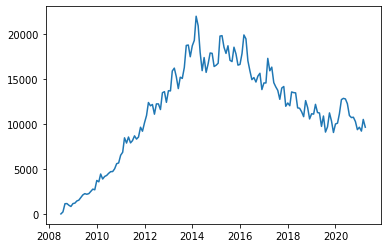

In [ ]:
plt.plot(reshaped_df.index, reshaped_df["java"])

Styling the chart

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

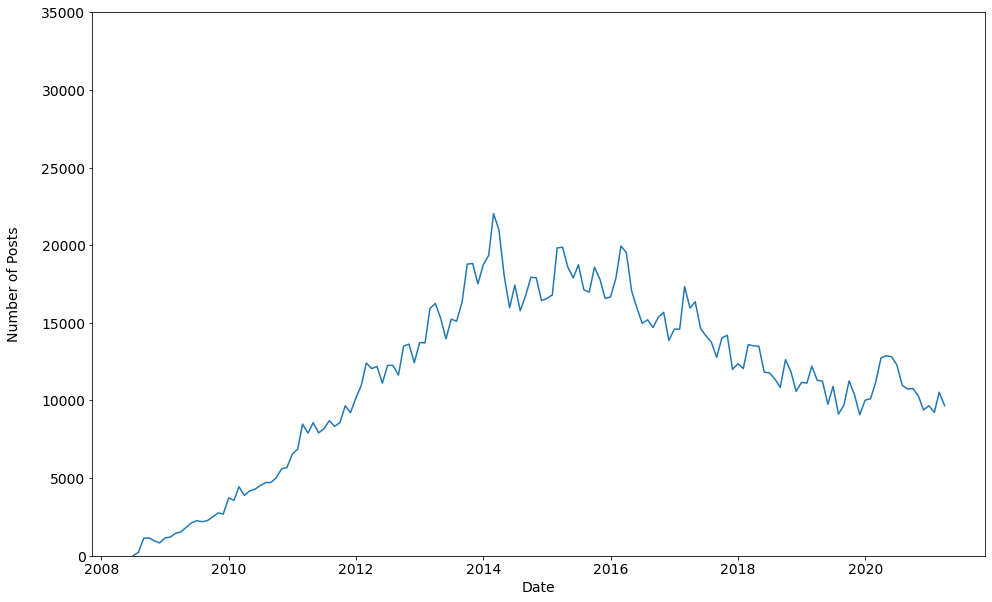

In [ ]:
plt.figure(figsize=(16,10))  # make plot bigger: width=16, height=10
plt.xticks(fontsize=14)  # make tick font size bigger to match bigger plot
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts\n", fontsize=14)
plt.ylim(0, 35000)  # set lower limit of 0 on y axis
plt.plot(reshaped_df.index, reshaped_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

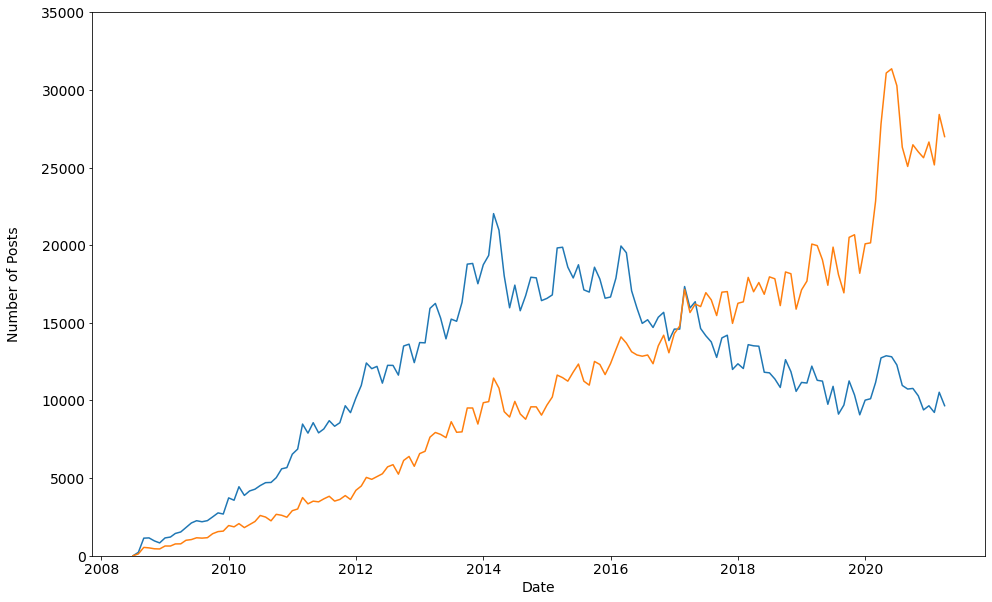

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts\n", fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

Plot all languages on same chart

Don't want to have to type .plot() lots of times!

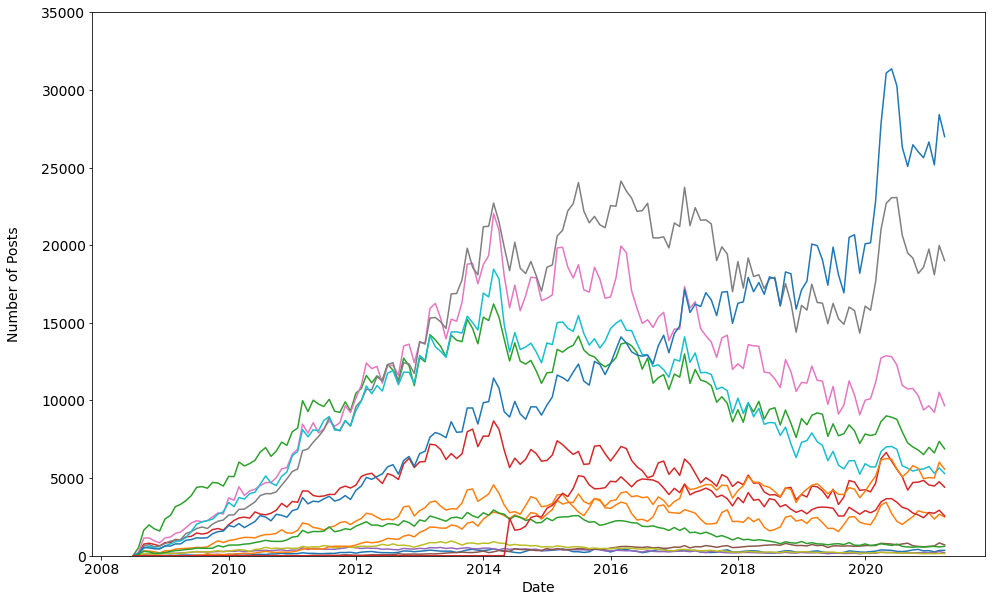

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts\n", fontsize=14)
plt.ylim(0, 35000)

for language in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[language])

Need a legend so that we know which line is which language!

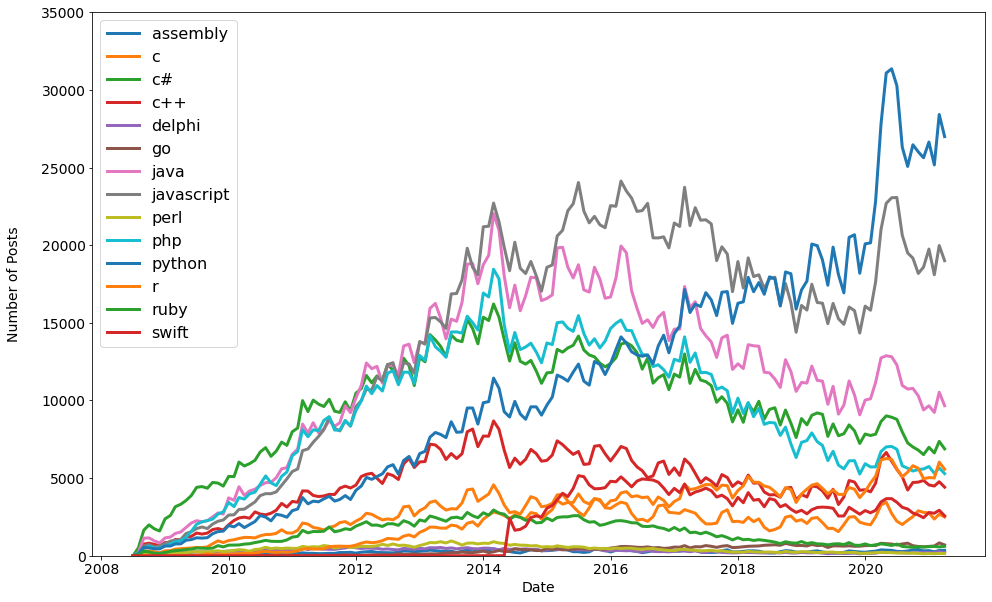

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts\n", fontsize=14)
plt.ylim(0, 35000)

# increase linewidth as well
for language in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[language],
             linewidth=3, label=reshaped_df[language].name)
    
plt.legend(fontsize=16)

Looks like python is the most popular language based on number of posts on Stack Overflow!

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
# window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=5).mean()

# lower window = fewer points averaged = more bumpy , eg try 3
# higher = more averaged = smoother, eg try 12!

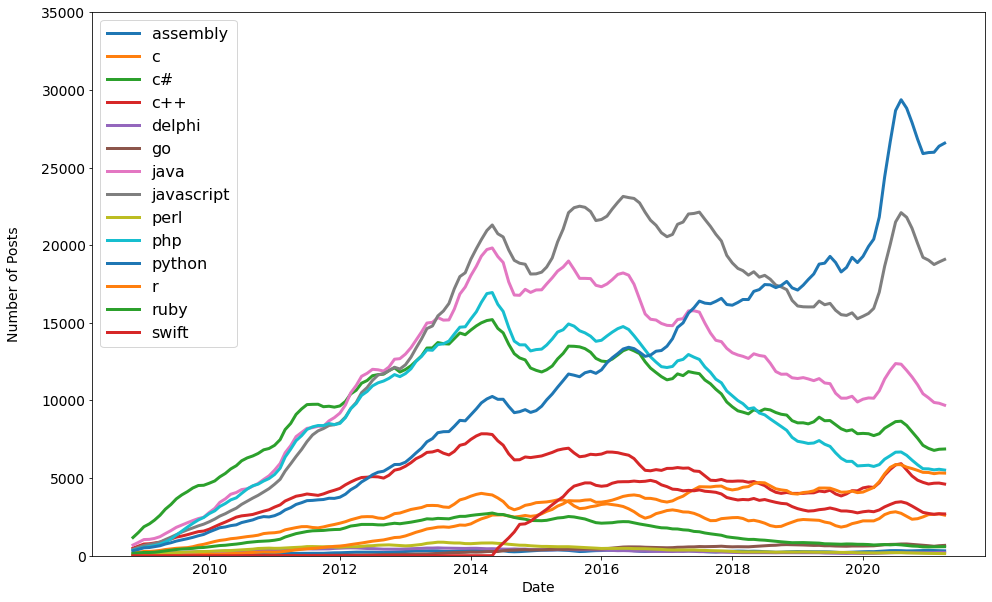

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts\n", fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for language in roll_df.columns:
    plt.plot(roll_df.index, roll_df[language],
             linewidth=3, label=roll_df[language].name)
    
plt.legend(fontsize=16)